## Read Drifter Data from EcoFOCI web

1986-2015 Quality Controlled Data is available from https://www.ecofoci.noaa.gov/drifters/efoci_drifterData.shtml

Formats and options change (as do headerlines and meta information) throughout the window of time available.  Usually, all files of a given year are well documented and similar.

In [4]:
import pandas as pd
import numpy as np

import datetime

In [19]:
#data directory
floats = {'106698':'2011',
        '119599':'2012',
        '119593':'2012',
        '119596':'2012',
        '119597':'2012',
        '128955':'2013',
        '128955':'2013',
        '122536':'2013',
        '122535':'2013',
        '122539':'2013',
        '122538':'2013',
        '136859':'2015',
        '136862':'2015',
        '136870':'2015',
        '136861':'2015',
        '136869':'2015',
        '136860':'2015',
        '122541':'2017',
        '122542':'2017',
        '122537':'2017',
        '122540':'2017',
        '139914':'2018',
        '139910':'2018'
}

In [20]:
data = {}
column_names=['latitude','longitude','year','doy','hhmm','drogue','battery','sst','satqual','ice']

#function to parse dates that are three column information
dateparse = lambda x: pd.datetime.strptime(x, '%Y %j %H%M')

#for i in range(136859,136873,1):
for key,value in floats.items():
    try:
        data.update({key:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/data'+str(value)+'/'+str(key)+'_y'+str(value)+'_withTandIce.asc', 
                    dtype={'hhmm': str, 'year': str, 'doy': str},
                    header=29,
                    names=column_names,
                    delimiter='\s+',
                    parse_dates=[['year','doy','hhmm']],
                    date_parser=dateparse, 
                    index_col='year_doy_hhmm')})
        print('https://www.ecofoci.noaa.gov/drifters/data'+str(value)+'/'+str(key)+'_y'+str(value)+'_withTandIce.asc')
    except:
        print("No data for {i}".format(i=key))

https://www.ecofoci.noaa.gov/drifters/data2011/106698_y2011_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2012/119599_y2012_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2012/119593_y2012_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2012/119596_y2012_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2012/119597_y2012_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2013/128955_y2013_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2013/122536_y2013_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2013/122535_y2013_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2013/122539_y2013_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2013/122538_y2013_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2015/136859_y2015_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2015/136862_y2015_withTandIce.asc
https://www.ecofoci.noaa.gov/drifters/data2015/136870_y2015_withTandIce.asc
https://www.

### Overview Plot using python-gmt

In [21]:
import gmt

In [22]:
fig = gmt.Figure()

fig.coast(region=[-175, -145, 65, 75], projection='B-160/60/55/60/6i', land='lightgray', water='gray',
          frame=True,U=True)

In [25]:
for drifterid,ddata in data.items():
    ddata['dayofyear'] = ddata.index.dayofyear
    #dfmiss.dayofyear.loc[(df.dayofyear > 0) | (df.dayofyear < 366)] = np.nan
    # normalize data for colormap
    fig.plot(x=-1*ddata.longitude, y=ddata.latitude, color=256*ddata.sst, cmap='thermal', style='c0.05c')

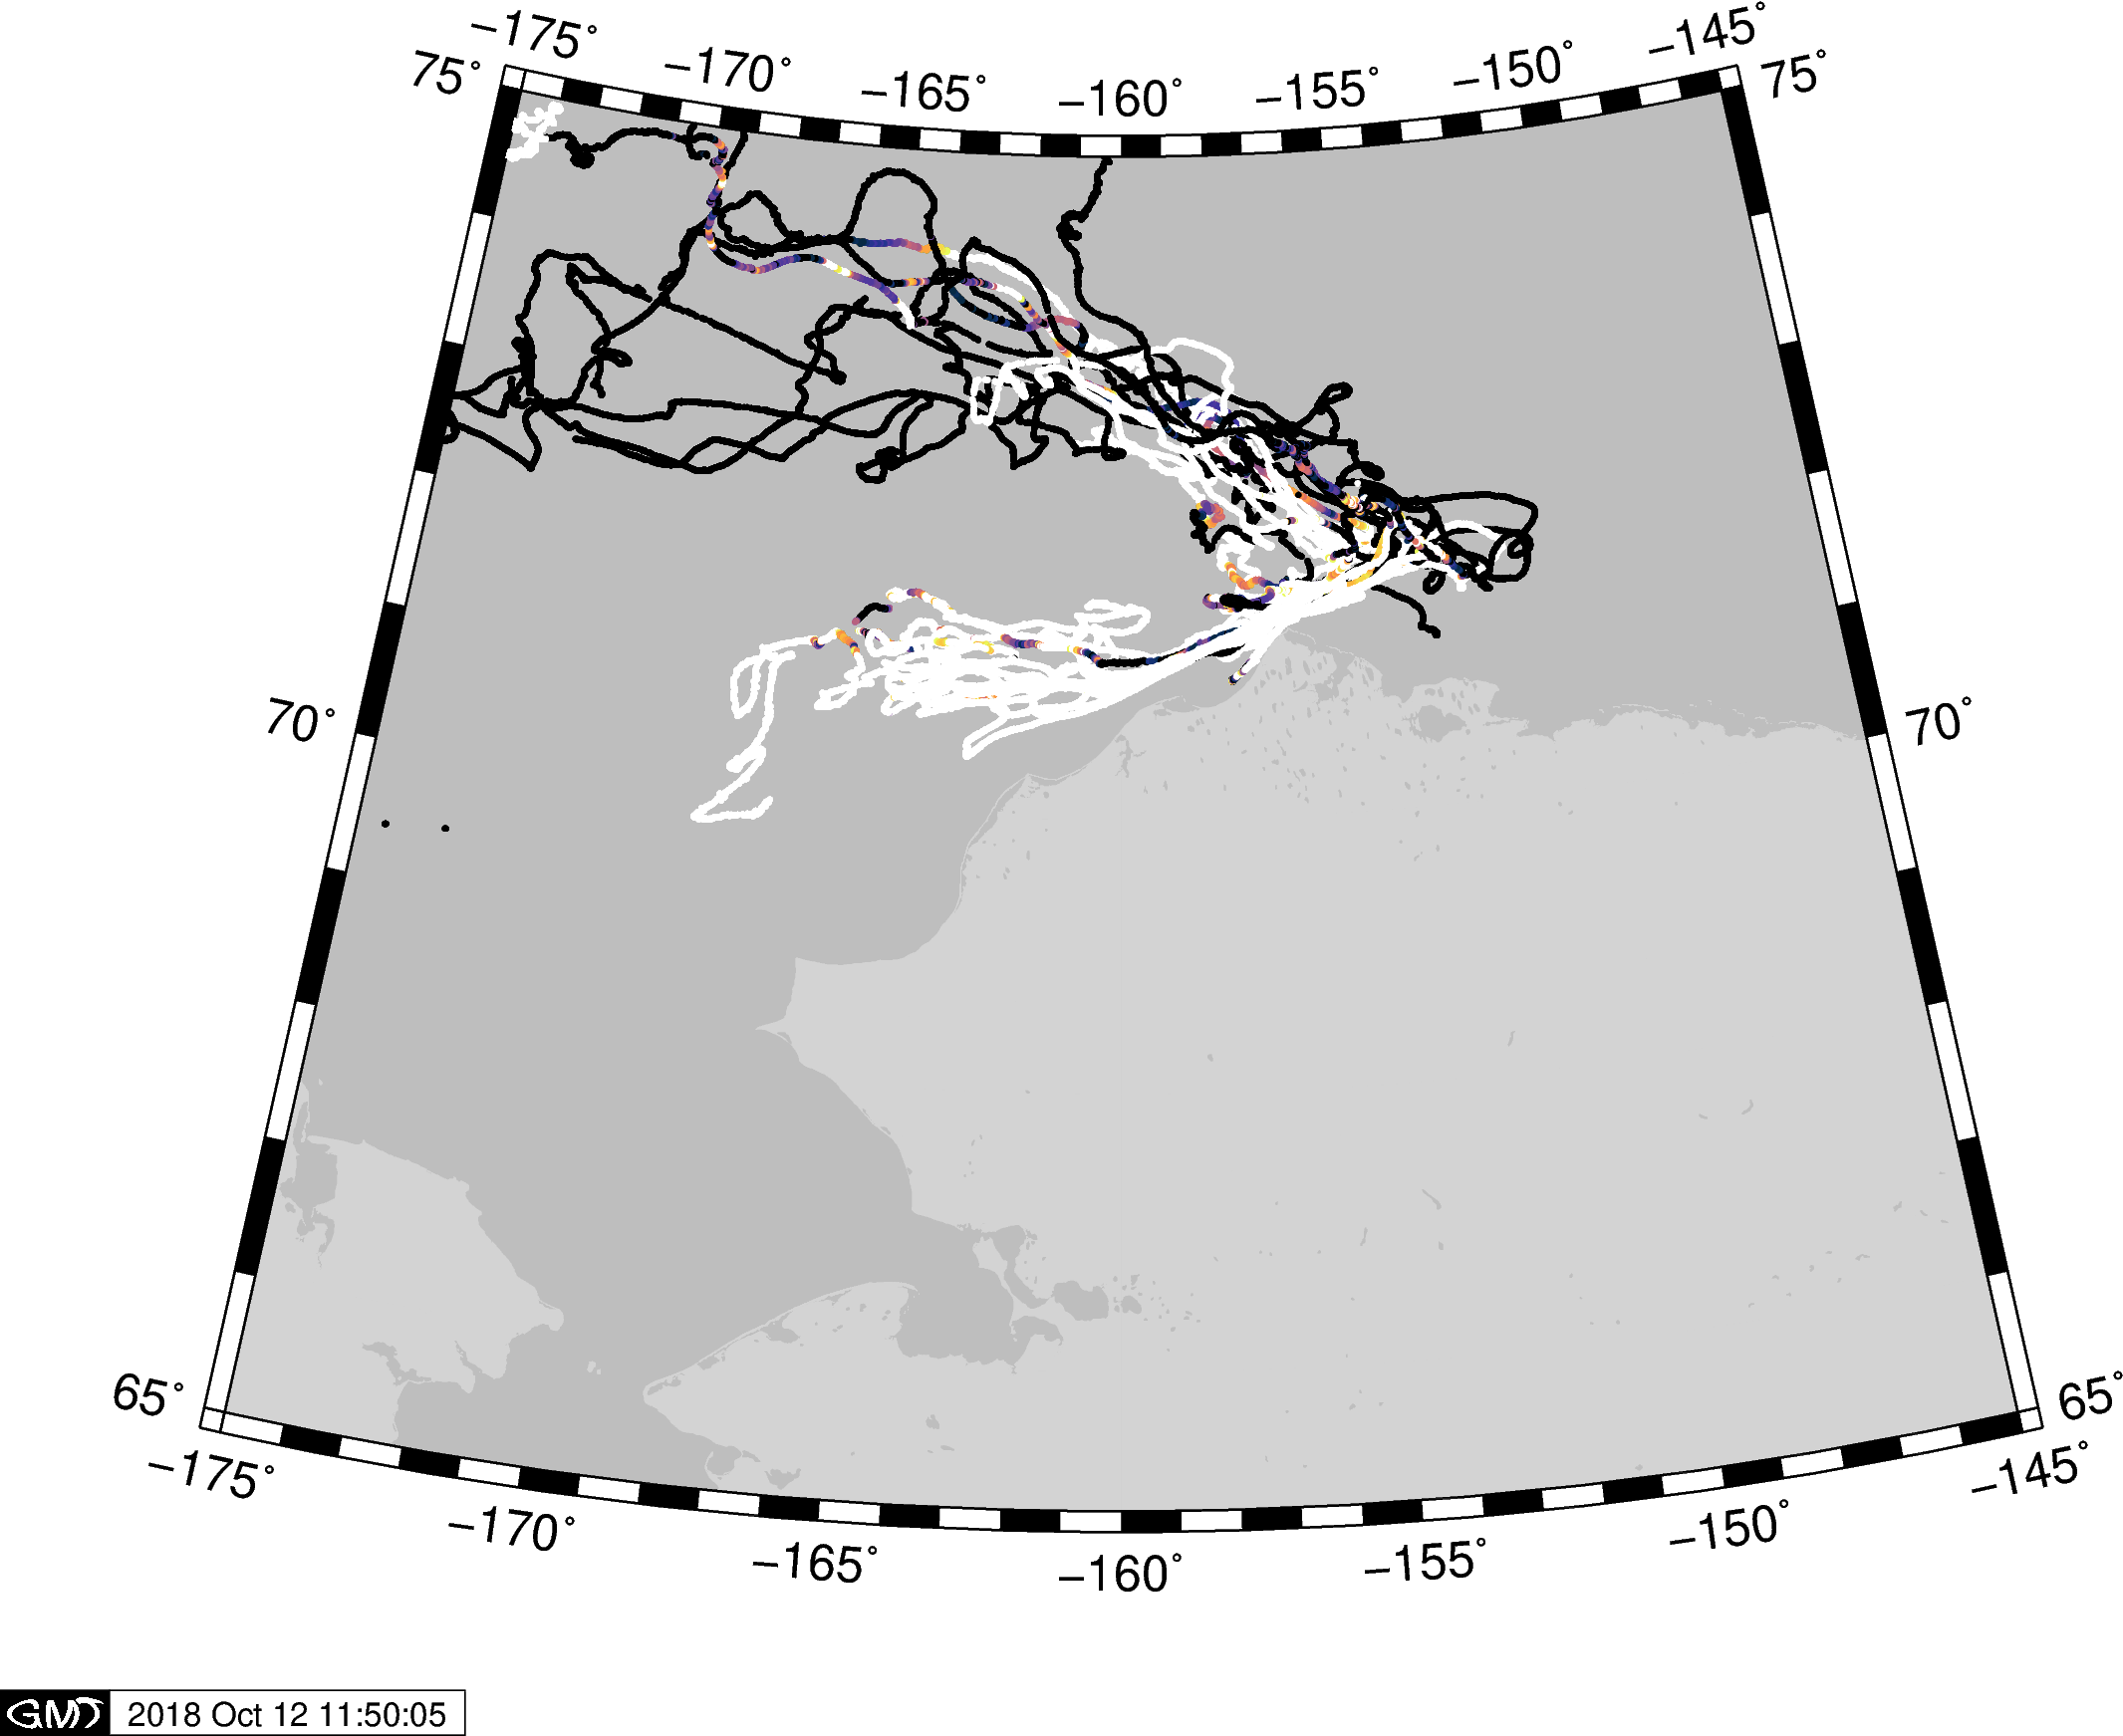

In [26]:
fig.show()

### Daily Plot using python-gmt

This creates an image for each day with a 7 day tail for the range of doy values specified

In [82]:
#choose temp boundaries
for dstep in range(180,365):

    fig1 = gmt.Figure()

    fig1.coast(region=[-175, -145, 65, 75], projection='B-160/60/55/60/6i', land='black', water='gray',
      frame=True,U=True)
    
    for drifterid,ddata in data.items():
        
        stopdate=datetime.datetime.strftime(datetime.datetime(2015,1,1)+datetime.timedelta(days=dstep),'%Y-%m-%d')
        startdate=datetime.datetime.strftime(datetime.datetime(2015,1,1)+datetime.timedelta(days=dstep)-datetime.timedelta(days=7),'%Y-%m-%d')
        
        dfmiss = ddata[startdate:stopdate].copy()

        dfnorm = dfmiss.apply(lambda x: (x - (-2)) / (14 - (2)))
        
        try:
            fig1.plot(x=-1*dfmiss.longitude, y=dfmiss.latitude, color=256*dfnorm.sst, cmap='thermal', style='c0.05c')
        except:
            pass
            
    fig1.savefig(stopdate + '.png')